## One Versus all regression

Some translation terms:
accuracy=exactitud
precision=precisión

## Uno contra el resto.
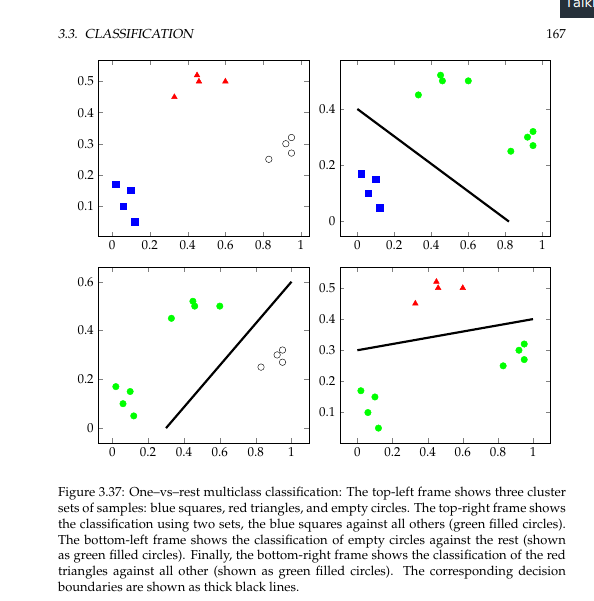

Basados en la grafica de arriba. De las tres categorias: triangulos rojos, cuadrados azules y circunferencias. 
Agrupamos inicialmente.

* Los cuadrados azules versus los demas. Ahora circulos verdes. Esto nos da una hipotesis: $h_1(\theta, x)$
para un $\theta$ optimo

* Ahora tomamos las circunferencias como una categoria y los cuadrados azules y triangulos rojos como otra que ahora son circulos verdes. Esto nos produce una nueva hipotesis $h_2(\theta, x)$. 

* Finalmente tomamos los triangulos rojos en un lado contra los cuadrados azules y las circunferencias, ahora circulos verdes. Esto nos produce una tercera hipotesis $h_3(\theta, x)$.

Cuando queremos evaluar donde queda un nuevo punto $x$.
Usamos la hipotesis

$$h(\theta, x) = \max_{i=1}^3 h_i(\theta , x)  $$
con el fin de maximizar la verosimilitud (likelihood).

Generalicemos: Asumamos que tenemos $K$ clases, entonces
podemos tomar en cada caso la clase $i$ contra el resto
$1, 2, \cdots, i-1, i+1, \cdots K$. Esto nos produce una
hipotesis $h_i(\theta, x)$. (resto $\cup_{j=1,j\ne i}^{K} A_j$ donde $A_j$ es la clase $j$.)

Dado un punto nuevo $x$, se evalua la hipotesis para este punto 

$$ h(\theta, x) = \max_{i=1}^K h_i(\theta ,x )$$



## Metricas de error: Analisis de exactitud de los resultados de ML en clasificacion.

Tenemos ciertos resultados pero como podemos juzgar si son buenos o no. Control de calidad (QC)

### La matriz de confusion.
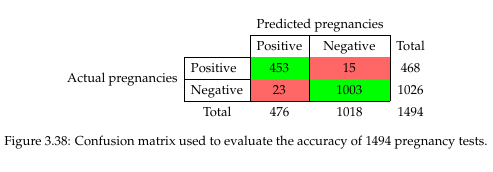

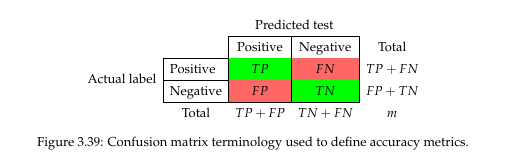

A esta matriz se le llama de *confusion*. Inicialmente es $2 \times 2$. Mas adelante la estimamos multiclase de oden $K$, la matriz de confusion es $K \times K$.


Hay muchas metricas basadas en la matriz de confusion.
En ese curso vemos una pocas.

Comenzamos con **accuracy** (exactitud)
$$\text{accuracy} = \frac{TP + TN}{m} $$

Esta otra medida es lo contrario. **missclassification rate*
(rata de clasificacion errado).

$$\text{missclassification rate} = 1 - \text{accuracy} = \frac{FP + FN}{m} $$

Antes de seguir con otras medidas (perdone que cambie el orden).
Vamos a ver como Python nos ayuda a obtener la matriz de confusion.



In [10]:
from sklearn.metrics import confusion_matrix


y_true=[1,0,1,1,0,1,1,0,1,1,0,0]
y_pred=[0,1,1,1,0,1,0,1,0,1,1,0]

tn , fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
M = confusion_matrix(y_true, y_pred)
M

print(f"tn={tn}, fp={fp}, fn={fn}, tp={tp}")
M

tn=2, fp=3, fn=3, tp=4


array([[2, 3],
       [3, 4]])

tn=(0,0) , fp=(0,1), (1,0), ( 1, 1)

Antes de seguir investigando metricas de precion, veamos algunos ejemplos:

* Pensemos en una EPS donde se quiere diagnosticar diabetes en pacientes. Pasa lo siguiente:

    * True Positive (verdadero positivo): Son pacientes que fueron diagnosticados con diabetes y tenian diabetes. Esto no es malo, aunque tener diabetes no es bueno.
    * True Negative (TN) (negativo verdadero). Si el examen salio N (negativo) salio que el paciente no tiene diabetes y el T de (true) dice que en verdad no tiene diabetes. Esta la mejor de todas las opciones.
    * False Positive (FP) (Falso positivo) . El diagostico dice que tiene diabetes pero no tiene. Esto genera problemas por limitarse en las comidas mas malestar sicologico, etc. Es malo pero no el peor

    * Falso Negativo (FN) (Falso negativo). El diagnostico es que no tiene diabetes pero si tiene. Este es el peor por que paciente sintiendose sano va y come azucar y empera. Peor aun si el problema es cancer. En este caso el paciente se tranquilza hasta que llega la metastasis y acaba con el.

* Detectar "spam" en e-mail.  (spam=mensajes indeseados).
    * TP: True positive (verdadero positivo): El mensaje se detecto como spam y de verdad era spam . O sea que se fue directo a la papelera sin nosotros darnos cuenta. Esto es :)
    * TN: True Negative (Verdadero Negativo). El mayensaje es legitimo, bueno y se detecta como tal. No se va a la papelera y esto es :)
    * FP: Falso positivo: El mensaje se detecta como spam y no lo es. Hay problemas. Piense que el mensaje es de un cliente clave en la compania. Se pierde un geocio millonario y usted pierde su trabajo . Que rabia!
    * FN: Falso negativo. Se detecta como no spam y no se borra. No hay prolema. Lo borramos "a mano". Los sistemas inteligentes , le permiten a uno marcarlos manualmente como spam para aprender y no volver a cometer el error con mensajes como este.

* Uno bancario con $m=1$. Usted recibe una carta que gano un premio grande pero debe dar sus datos bancarios para que le consignen. 
        



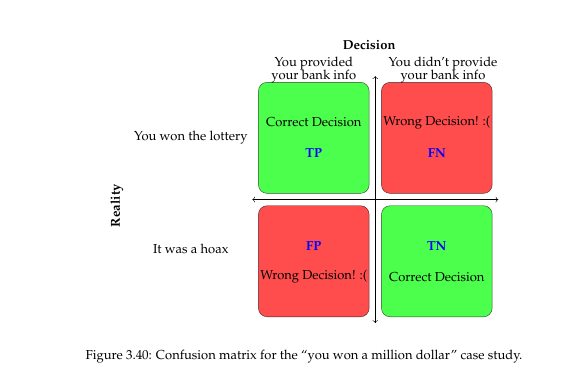

Cuantificacion de la matriz de confusion.
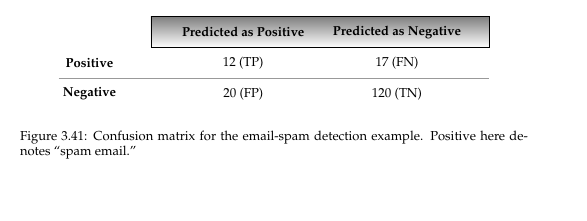

$$\text{accuracy} = \frac{12 + 120 }{12 + 120 + 17 + 20 }=0.781 $$
es decir $78.1 \%$

Digamos que el sistema que tenemos piensa que **todos** los mensajes son buenos (todo es negativo).

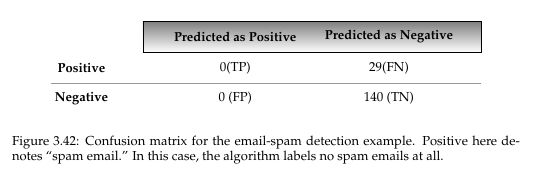

$$\text{accuracy} = \frac{0+140}{29+140} =0.828$$
o sea $82.8\%$. Increible. Esto quiere decir que esta metrica no es buena para este ejmplo.

Aparecen nuevas medidas: **precision**. La idea es obtener la proporcion de los verdaderos positivo (TP) con respecto a todos los positivos (TP + FP)

\begin{eqnarray}
 \text{precision} = \frac{TP}{TP + FP  + \epsilon} = 0/(0+\epsilon) = 0
\end{eqnarray}
NaN: no es bueno, normalmente 



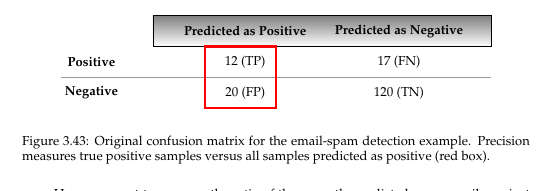

Para este ejemplo la precision esta dada por

$$\text{precision} = \frac{12}{32} =0.375$$
En porcentaje es $37.5\%$.

Otra metrica es el **recall** (sensitivity, o sensitividad)

$$\text{recall} = \frac{TP}{TP + FN} $$


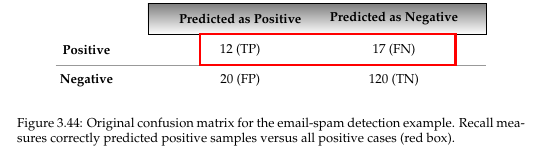

$$ \text{recall} = \frac{12}{12 +17}=0.413$$
en porcentaje $41.3 \%$.

Si todos los "hits" estan en la diagonal entonces 
FN=FP=0 entonces
accuracy=precision=recall

El recall tiene otros nombres: sensitividad, true positive rate TPR. Existe otra, en contraste que se llama FPR=False Positive Rate

$$ \text{TPR} = \frac{TP}{TP + FN} \quad , \quad \text{FPR} = \frac{FP}{FP + TN}$$

La ultima de este estilo (las otras son curvas, estas son numeros indicadores) se llama F1 score:

Si los numeros por fuera de la diagonal son muy similares, entonces TPR, FPR no tiene problema. Pero muy distintos, entre cual de los dos escogemos. El F1 score es un promedio harmonico
entre precision y recall. 

Por definicion

$$ \text{F1 score} = \left (\frac{\frac{1}{\text{precision}} + \frac{1}{\text{recall}}}{2}  \right )^{-1}$$



La ultima medida: AUC-ROC.
AUC=Area bajo la curva, ROC=Receiver Operating Characteristic.

La ROC es una curva parametrica donde el parametro es el umbral $\gamma$ . $ 0 \le \gamma \le 1$. La curva es el
TPR versus el FPR. Variando el umbral $\gamma$ encontramos la curva
$(TPR(\gamma), FPR(\gamma))$. Todos aquellos que esten por encima del umbral $\gamma$ son positivos. 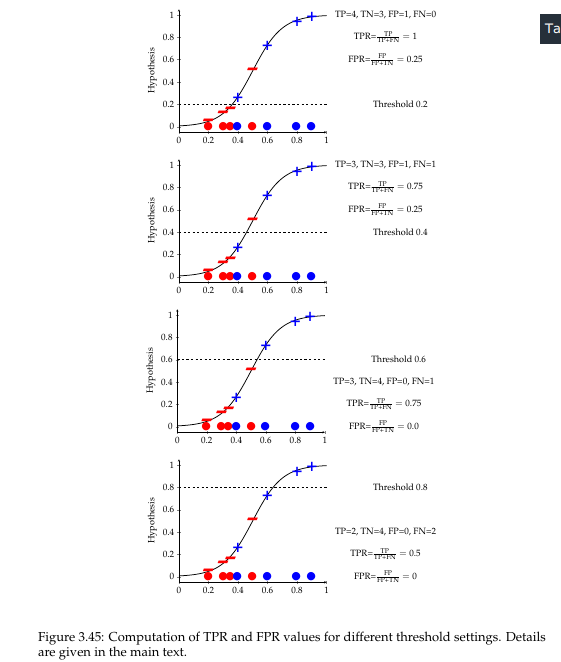

comenzmos con $\gamma=0$. TP=4, FP=4, TN=0, FN=0 de forma que

$$TPR = \frac{TP}{TP + FN} = 1  $$
$$ FPR = \frac{FP}{FP + TN}= 1 $$

Cuando $\gamma=1$. TP=0, TN=4, FP=0, FN=4,

$$TPR = \frac{TP}{TP + FN} = 0  $$
$$ FPR = \frac{FP}{FP + TN}= 0 $$


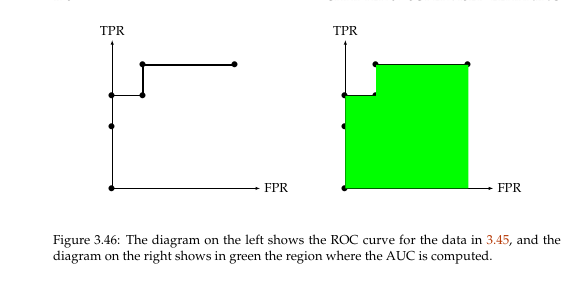

El AUC = $1 - 0.25^2 = 0.975$. 

Veamos un ejemplo de ROC-AUC en Python

In [28]:
from sklearn.datasets import make_multilabel_classification
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn import datasets

X, y = datasets.make_classification( random_state=1, n_samples=1000, n_classes=2)

# partimos en training y testing (entrenamiento y prueba)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)


In [29]:
X.shape

(1000, 20)

In [32]:
y.shape

(1000,)

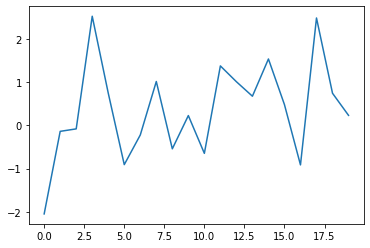

In [33]:
import matplotlib.pyplot as plt
plt.plot(X[0])

In [34]:
y[10]

0

In [35]:
len(X_train)

750

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


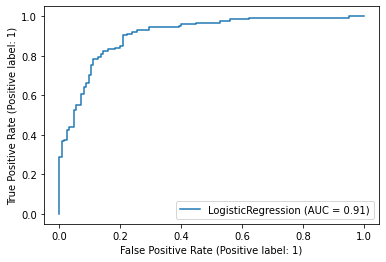

In [38]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)

Por que F1 score usa la media armonica en vez otras media.

### Medias pitagoricas.
Dados dos numeros $a,b$ positivos

1) Media aritmetica: 
$$ A = \frac{a+b}{2}  $$
2) Media geometrica
$$ G = \sqrt{ab} $$
3) RMS: Root Mean Square:

$$ Q = \sqrt{\frac{a^2 + b^2}{2}}  $$

4) Media armonica:
$$ H = \frac{1}{ \frac{\frac1a + \frac1b}{2}} $$

Se puede probar que ⁉
* $H < G < A < Q$  si $a \ne b$ 
* $H=G=A=Q$ si $a=b$
* Si $b=0$ entonces $A=a/2$, $Q=\sqrt{2a}$, $G=0$, $H=0$. El caso $a=0$ es parecido, se deja como ejercicio. La armonica no esta definida si $a=0$ o $b=0$.












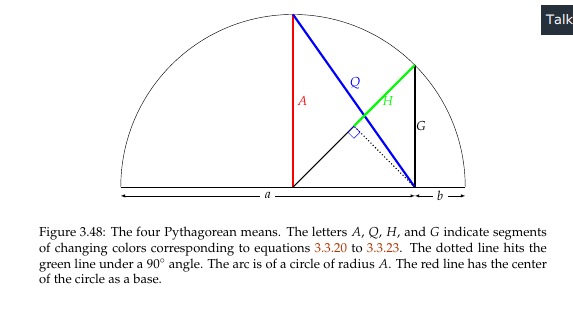

Cual seria la generalizacion de la matriz de confusion para un problema de clasificaion con $K>2$.


La matriz de orden $K \times K$. Por ejemplo expliquemos la siguiente grafica

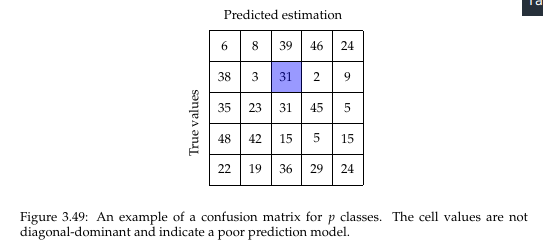

$$\text{accuracy} = \frac{\sum_{i=1}^K \ell_{ii} }{m} $$
$m$ es el numero total de muestras.

Definimos adicionalmente

\begin{eqnarray}
TP_i &=& \ell_{ii} \\
FP_i &=& \sum_{l=1}^K \ell_{li} - TP_i \\
FN_i &=& \sum_{l=1}^K \ell_{i l} - TP_i \\
TN_i &=& \sum_{l=1}^K \sum_{j=1}^K - TP_i - FP_i - FN_i
\end{eqnarray}

En general : Accuracy: que tantas veces el clasificador es correcto.
Missclassification rate: En general que tan comun es que el clasificador falle.
Recall/Sensitivity/ TPR: Cuando el elemento es cierto, que tanto se predice que en efecto sea cierto.

Precision: Cuando predice cierto, que tan a menudo esto pasa.

